<a href="https://colab.research.google.com/github/marsc0des/Pokemon-Classification/blob/main/Pokemon_Classification_LogReg_and_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pokémon Classification Using Logistic Regression and Decision Trees

## Introduction

In this project, I explore the use of supervised learning algorithms—Logistic Regression and Decision Trees—to classify whether a Pokémon is Legendary based on its stats and attributes. I use the complete Pokémon dataset containing information on all Pokémon from Generations 1 through 8.

## Load Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
import os
data_path = ['data']
filepath = os.sep.join(data_path + ['pokemon.csv'])
df = pd.read_csv(filepath)

## Data Preprocessing and Feature Engineering

In [ ]:
# Drop unnecessary or non-numeric columns
df = df.drop(['abilities', 'pokedex_number'], axis=1)

# Fill missing type2 with 'None'
df['type2'] = df['type2'].fillna('None')

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['type1', 'type2'])

# Drop any remaining non-numeric columns (like 'classfication' or similar descriptors)
df = df.select_dtypes(include=[np.number])

# Drop rows with NaNs just in case
df = df.dropna()

# Set target and features
y = df['is_legendary']
X = df.drop('is_legendary', axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Logistic Regression

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))


Logistic Regression:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## Decision Tree Classifier

In [ ]:
# Decision Tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))



Decision Tree:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


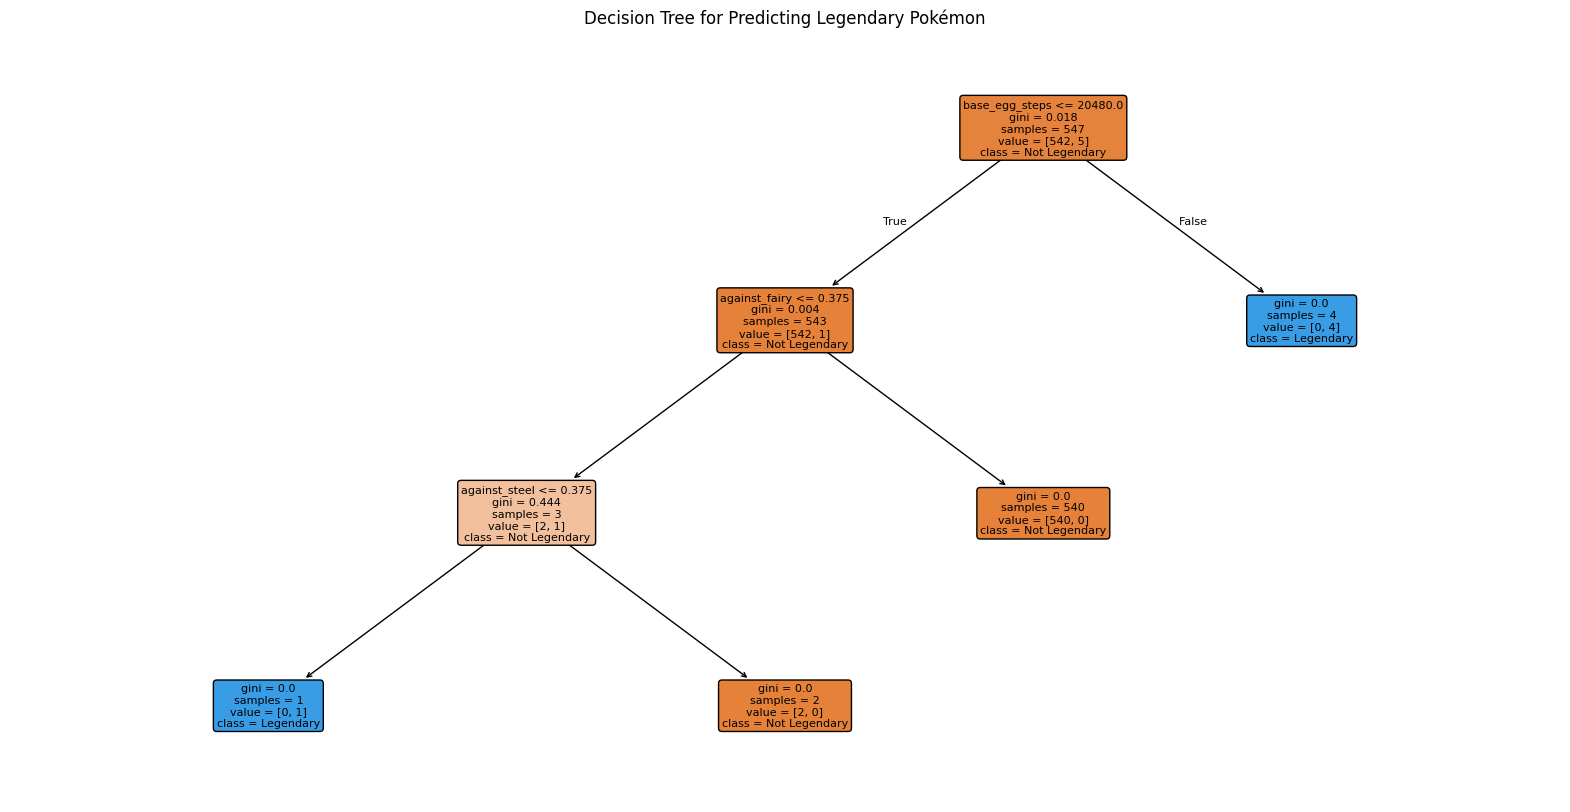

In [ ]:
# Visualize decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["Not Legendary", "Legendary"],
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree for Predicting Legendary Pokémon")
plt.show()


## Confusion Matrices

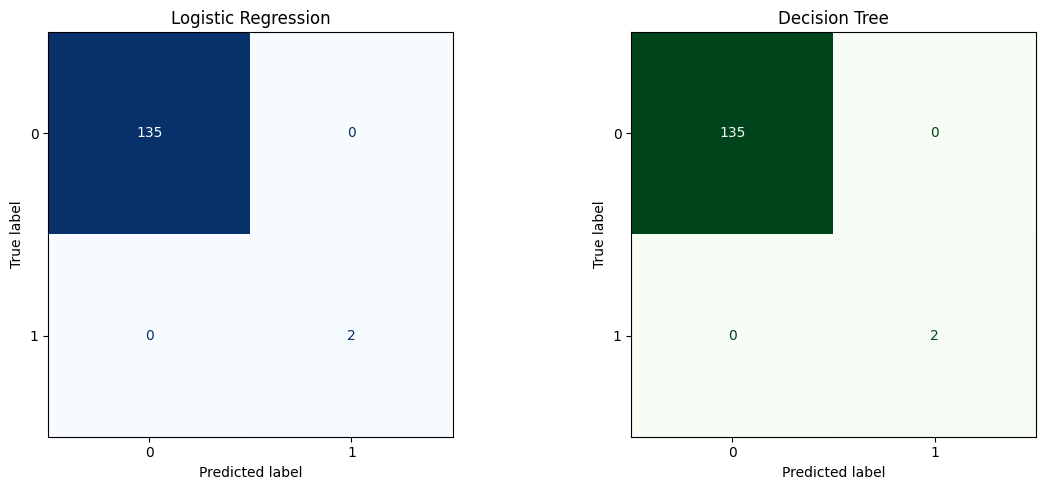

In [ ]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Logistic Regression")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("Decision Tree")
plt.tight_layout()
plt.show()

## Additional Visualizations

## Feature Importance (Decisision Tree)

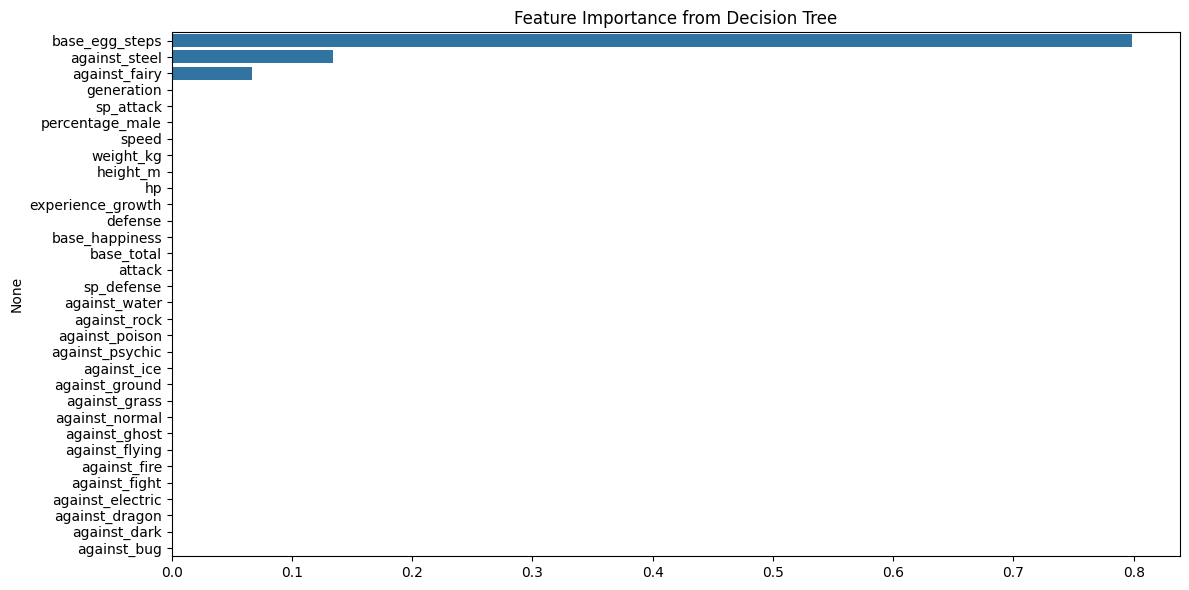

In [ ]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance from Decision Tree")
plt.tight_layout()
plt.show()

##Correlation Matrix (Only numeric features)

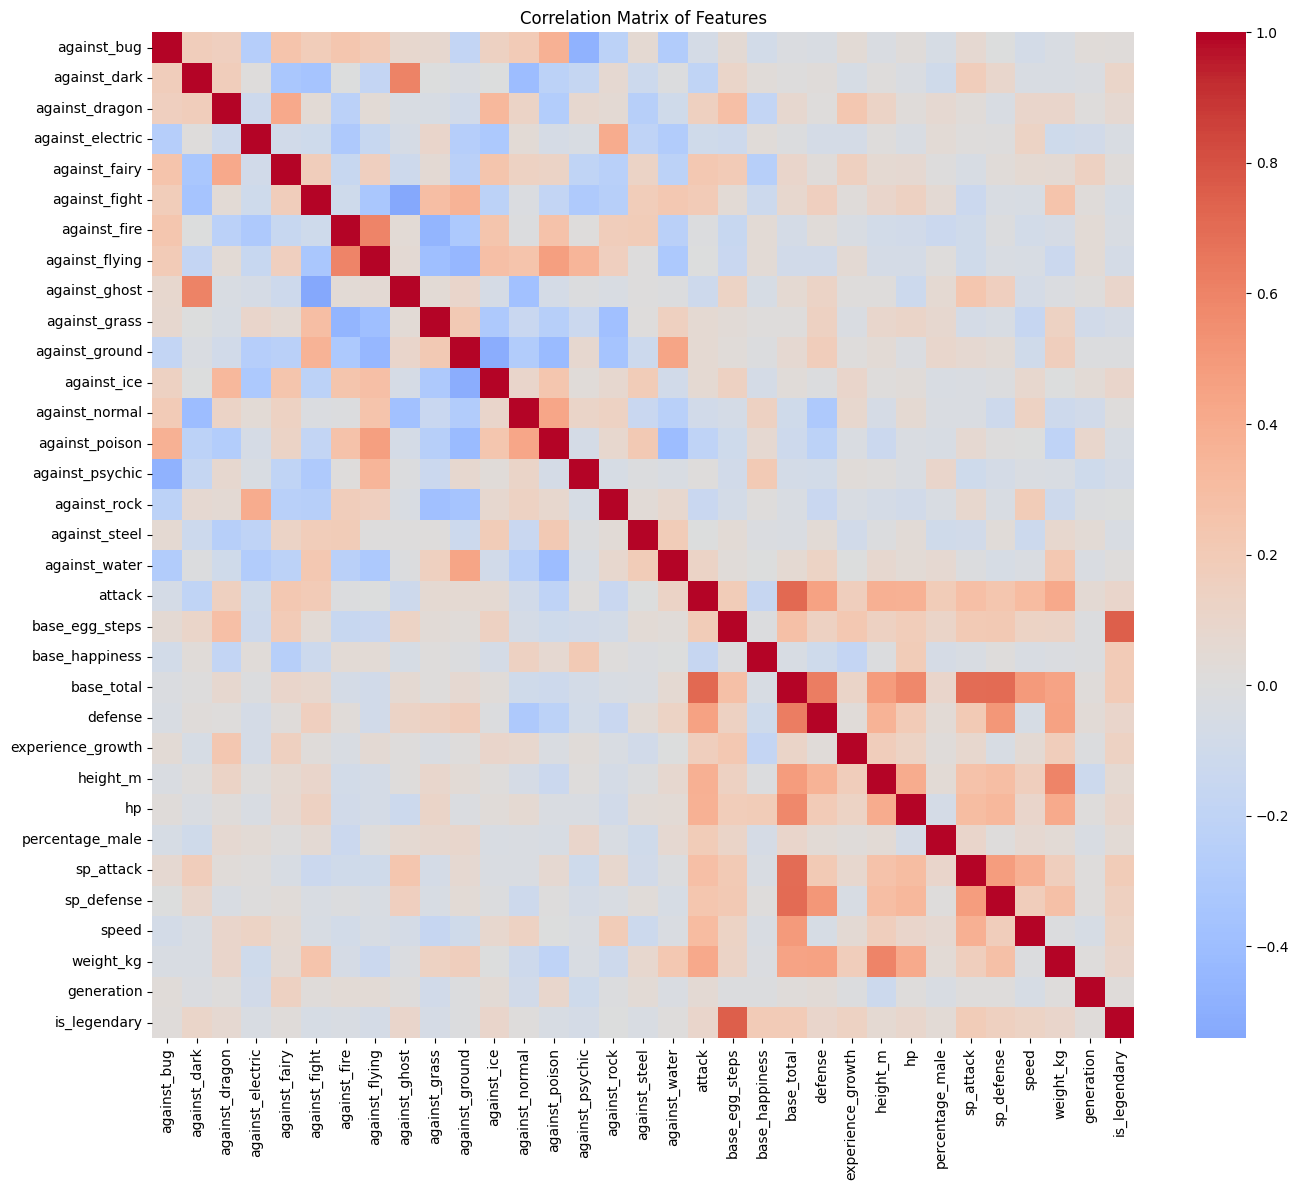

In [ ]:
plt.figure(figsize=(14, 12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()

##Class Distribution

<ipython-input-33-305e2347b83e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


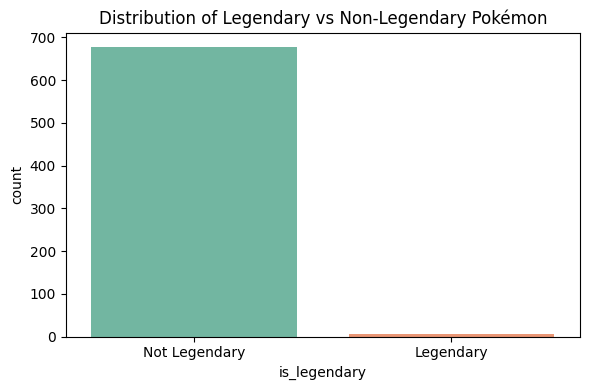

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='Set2')
plt.title("Distribution of Legendary vs Non-Legendary Pokémon")
plt.xticks([0, 1], ["Not Legendary", "Legendary"])
plt.tight_layout()
plt.show()

##ROC Curve

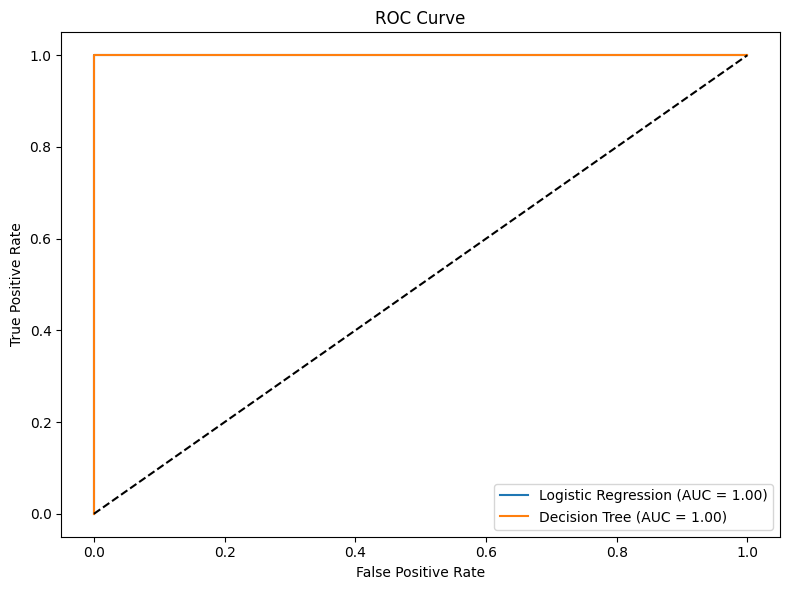

In [ ]:
from sklearn.metrics import roc_curve, auc

lr_probs = lr.predict_proba(X_test_scaled)[:, 1]
tree_probs = clf.predict_proba(X_test)[:, 1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)

plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {auc(lr_fpr, lr_tpr):.2f})')
plt.plot(tree_fpr, tree_tpr, label=f'Decision Tree (AUC = {auc(tree_fpr, tree_tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

##PCA Visualization

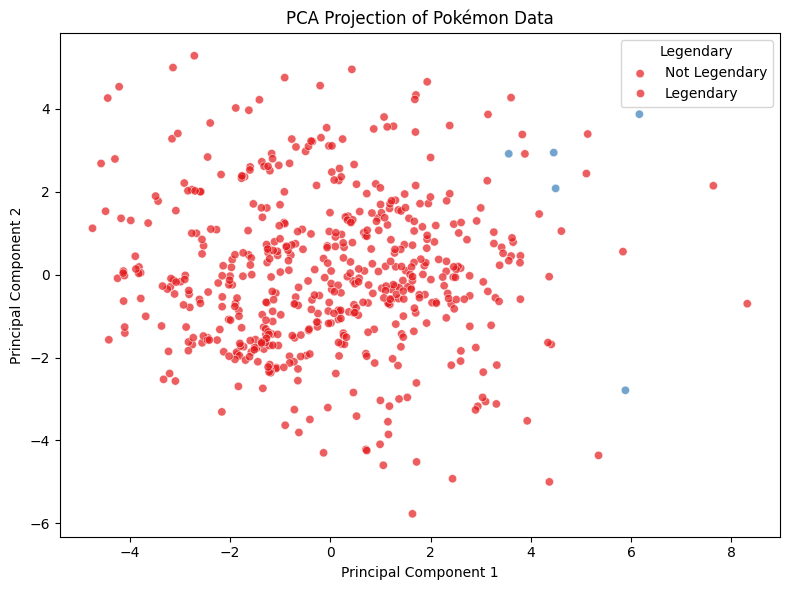

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='Set1', alpha=0.7)
plt.title("PCA Projection of Pokémon Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Legendary", labels=["Not Legendary", "Legendary"])
plt.tight_layout()
plt.show()


## Conclusion

Both Logistic Regression and Decision Tree models were able to classify Pokémon as Legendary with reasonable accuracy. The Decision Tree provided slightly better recall, which is useful in correctly identifying Legendary Pokémon. Each model has its strengths, and the choice depends on the specific use case—interpretability or probability estimates.